In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt, matplotlib.image as mpimg, seaborn as sns 
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization, Conv2D
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, classification_report

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train_path = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train'
valid_path = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation'
test_path = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test'
batch_size = 32

train_mask = train_path + '/WithMask'
train_normal = train_path + '/WithoutMask'

valid_mask = valid_path + '/WithMask'
valid_normal = valid_path + '/WithoutMask'

test_mask = test_path + '/WithMask'
test_normal = test_path + '/WithoutMask'

In [3]:
print('With Mask')
print('Total training images',len(os.listdir(train_mask)))
print('Total valid images',len(os.listdir(valid_mask)))
print('Total test images',len(os.listdir(test_mask)))

print('\n')

print('Without Mask')
print('Total training images',len(os.listdir(train_normal)))
print('Total valid images',len(os.listdir(valid_normal)))
print('Total test images',len(os.listdir(test_normal)))

With Mask
Total training images 5000
Total valid images 400
Total test images 483


Without Mask
Total training images 5000
Total valid images 400
Total test images 509


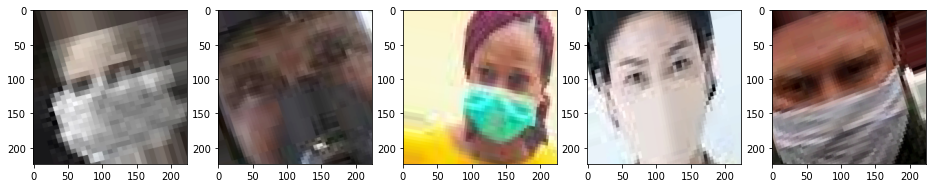

In [4]:
f,axes = plt.subplots(1,5, figsize=(16,4))
images = os.listdir(train_mask)[:5]

for i, img in enumerate(images):
    img = plt.imread(os.path.join(train_mask,img))
    axes[i].imshow(img)

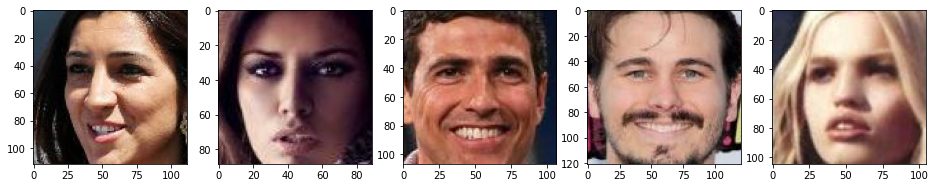

In [5]:
f,axes = plt.subplots(1,5, figsize=(16,4))
images = os.listdir(train_normal)[:5]

for i, img in enumerate(images):
    img = plt.imread(os.path.join(train_normal,img))
    axes[i].imshow(img)

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rescale=.1/255).flow_from_directory(train_path, batch_size=batch_size, shuffle=True, color_mode='grayscale', target_size=(128,128), class_mode='binary')
valid_generator = ImageDataGenerator(rescale=.1/255).flow_from_directory(valid_path, batch_size=batch_size, shuffle=False, color_mode='grayscale', target_size=(128,128), class_mode='binary')
test_generator= ImageDataGenerator(rescale=.1/255).flow_from_directory(test_path, batch_size=batch_size, shuffle=False, color_mode='grayscale', target_size=(128,128), class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [7]:
model = Sequential()
# kernel_regularizer=keras.regularizers.l2(0.0001)
model.add(Conv2D(128, (3,3),input_shape=(128,128,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(16, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.summary()

2023-01-23 18:05:36.560251: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-23 18:05:36.654117: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-23 18:05:36.654900: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 128)     1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 16)        9

2023-01-23 18:05:36.657189: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-23 18:05:36.657477: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-23 18:05:36.658198: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-23 18:05:36.658824: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.9/989.9 kB 3.7 MB/s eta 0:00:00a 0:00:01


Error: no "view" mailcap rules found for type "image/png"
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening '/tmp/tmprlhwwz3m.PNG'
Error: no "view" mailcap rules found for type "image/png"
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening '/tmp/tmpl6spm0gb.PNG'


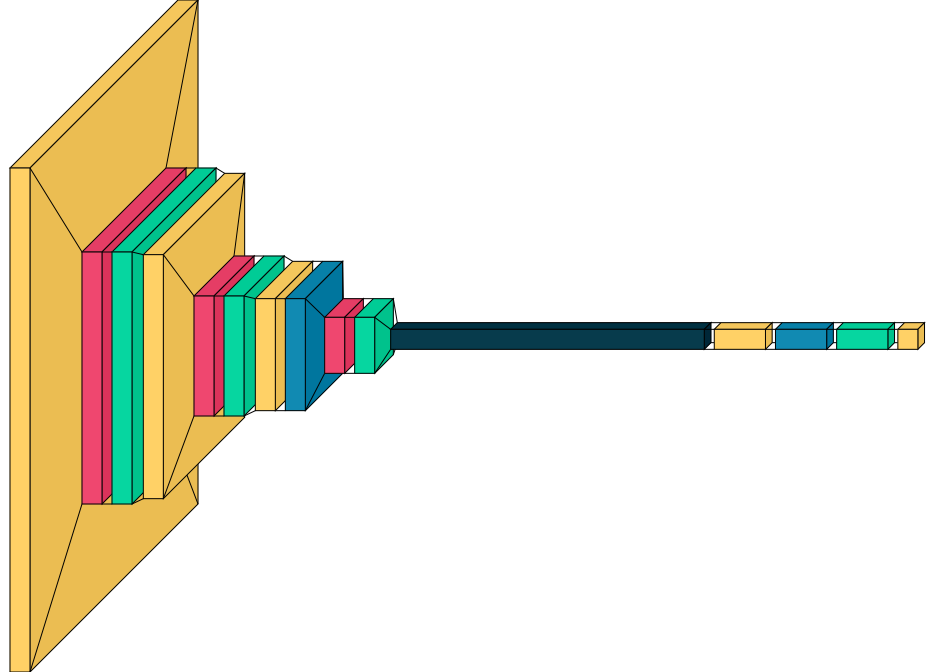

In [50]:
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model).show() 
visualkeras.layered_view(model, to_file='output.png')
visualkeras.layered_view(model, to_file='output.png').show()
visualkeras.layered_view(model)

In [8]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [11]:
history = model.fit(train_generator,verbose=1,validation_data=valid_generator,steps_per_epoch=100,epochs=50,callbacks=callbacks)

Epoch 1/50
100/100 [==============================] - 23s 230ms/step - loss: 0.3257 - accuracy: 0.8756 - val_loss: 0.4957 - val_accuracy: 0.8087
Epoch 2/50
100/100 [==============================] - 15s 151ms/step - loss: 0.2318 - accuracy: 0.9139 - val_loss: 0.5499 - val_accuracy: 0.6675
Epoch 3/50
100/100 [==============================] - 13s 127ms/step - loss: 0.1869 - accuracy: 0.9347 - val_loss: 0.2790 - val_accuracy: 0.9375
Epoch 4/50
100/100 [==============================] - 11s 107ms/step - loss: 0.1592 - accuracy: 0.9409 - val_loss: 1.1183 - val_accuracy: 0.7350
Epoch 5/50
100/100 [==============================] - 10s 105ms/step - loss: 0.1456 - accuracy: 0.9456 - val_loss: 0.5509 - val_accuracy: 0.8512
Epoch 6/50
100/100 [==============================] - 10s 97ms/step - loss: 0.1290 - accuracy: 0.9528 - val_loss: 0.0843 - val_accuracy: 0.9725
Epoch 7/50
100/100 [==============================] - 9s 90ms/step - loss: 0.1337 - accuracy: 0.9575 - val_loss: 0.0641 - val_accur

In [12]:
def plot_accuracy_and_loss(history):
    n = len(history.history["loss"])
    fig = plt.figure(figsize=(12,6))

    ax = fig.add_subplot(1,2,1)
    ax.plot(range(n), (history.history["loss"]),'r', label="Train Loss")
    ax.plot(range(n), (history.history["val_loss"]),'b', label="Validation Loss")
    ax.legend()
    ax.set_title('Loss over iterations')

    ax = fig.add_subplot(1,2,2)
    ax.plot(range(n), (history.history["accuracy"]),'r', label="Train accuracy")
    ax.plot(range(n), (history.history["val_accuracy"]),'b', label="Validation,accuracy")
    ax.legend()
    ax.set_title('Accuracy over iterations')

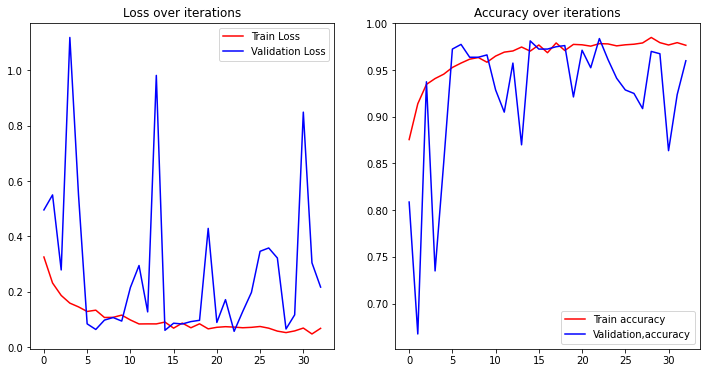

In [13]:
plot_accuracy_and_loss(history)

In [15]:
pred_prob = model.predict(test_generator)
pred = np.where(pred_prob>0.5,1,0)

In [16]:
y_test = test_generator.classes
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       483
           1       0.96      0.93      0.94       509

    accuracy                           0.94       992
   macro avg       0.94      0.94      0.94       992
weighted avg       0.94      0.94      0.94       992



<AxesSubplot:>

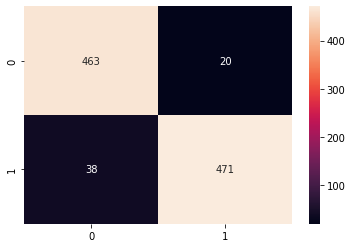

In [17]:
cm = confusion_matrix(test_generator.classes,pred)
cm_df = pd.DataFrame(cm, index=['0','1'],columns=['0','1'])
sns.heatmap(cm_df,annot=True,fmt='g')

In [18]:
def plot_and_print_auc(pred_prob):
    fpr, tpr, threshold = roc_curve(test_generator.classes, pred_prob)
    auc_score = auc(fpr, tpr)
    print('auc score: ',auc_score)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='area = {:.3f}'.format(auc_score))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

auc score:  0.9741810963729475


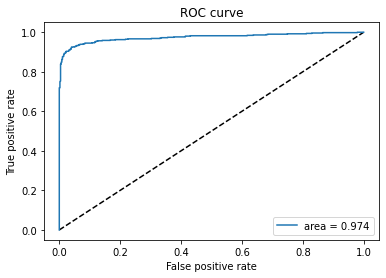

In [19]:
plot_and_print_auc(pred_prob)

In [20]:
train_gen = ImageDataGenerator(horizontal_flip=True, rotation_range=10,width_shift_range=0.05, height_shift_range=0.05,shear_range=0.05,zoom_range=0.05, rescale=.1/255)
train_generator = train_gen.flow_from_directory(train_path, batch_size=batch_size, shuffle=True, color_mode='grayscale', target_size=(128,128), class_mode='binary')
# valid_generator = ImageDataGenerator(rescale=.1/255).flow_from_directory(valid_path, batch_size=batch_size, shuffle=True, color_mode='grayscale', target_size=(128,128), class_mode='binary')
# test_generator = ImageDataGenerator(rescale=.1/255).flow_from_directory(test_path, batch_size=batch_size, shuffle=True, color_mode='grayscale', target_size=(128,128), class_mode='binary')

Found 10000 images belonging to 2 classes.


In [21]:
history2 = model.fit(train_generator,verbose=1,validation_data=valid_generator,steps_per_epoch=100,epochs=50,callbacks=callbacks)

Epoch 1/50
100/100 [==============================] - 12s 118ms/step - loss: 0.1445 - accuracy: 0.9567 - val_loss: 0.0927 - val_accuracy: 0.9700
Epoch 2/50
100/100 [==============================] - 12s 121ms/step - loss: 0.1056 - accuracy: 0.9664 - val_loss: 0.1627 - val_accuracy: 0.9600
Epoch 3/50
100/100 [==============================] - 12s 120ms/step - loss: 0.1072 - accuracy: 0.9623 - val_loss: 0.2344 - val_accuracy: 0.9300
Epoch 4/50
100/100 [==============================] - 12s 119ms/step - loss: 0.1057 - accuracy: 0.9634 - val_loss: 0.1704 - val_accuracy: 0.9513
Epoch 5/50
100/100 [==============================] - 12s 119ms/step - loss: 0.1205 - accuracy: 0.9570 - val_loss: 2.7493 - val_accuracy: 0.7262
Epoch 6/50
100/100 [==============================] - 12s 117ms/step - loss: 0.1078 - accuracy: 0.9625 - val_loss: 0.2740 - val_accuracy: 0.9350
Epoch 7/50
100/100 [==============================] - 12s 123ms/step - loss: 0.0944 - accuracy: 0.9669 - val_loss: 0.2327 - val_ac

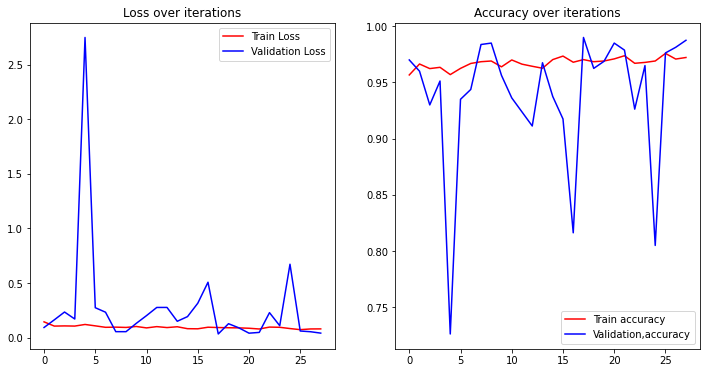

In [22]:
plot_accuracy_and_loss(history2)

<AxesSubplot:>

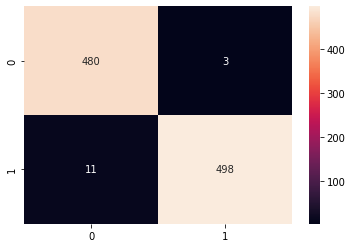

In [27]:
pred_prob2 = model.predict(test_generator)
predict2 = (pred_prob2>0.5).astype('int32')

cm = confusion_matrix(test_generator.classes,predict2)
cm_df = pd.DataFrame(cm, index=['0','1'],columns=['0','1'])

sns.heatmap(cm_df,annot=True,fmt='g')

In [48]:
print(classification_report(y_test, predict2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       483
           1       0.99      0.98      0.99       509

    accuracy                           0.99       992
   macro avg       0.99      0.99      0.99       992
weighted avg       0.99      0.99      0.99       992



auc score:  0.9991620804809496


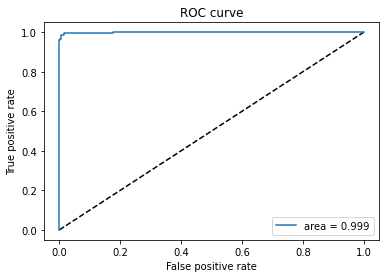

In [28]:
plot_and_print_auc(pred_prob2)

In [ ]:
train_generator = train_gen.flow_from_directory(train_path, batch_size=batch_size, shuffle=True, target_size=(128,128), class_mode='binary')
# valid_generator = ImageDataGenerator(rescale=.1/255).flow_from_directory(valid_path, batch_size=batch_size, shuffle=True, target_size=(128,128), class_mode='binary')
# test_generator = ImageDataGenerator(rescale=.1/255).flow_from_directory(test_path, batch_size=batch_size, shuffle=True, target_size=(128,128), class_mode='binary')

In [38]:
train_generator3 = train_gen.flow_from_directory(train_path, batch_size=batch_size, shuffle=True, target_size=(128,128), class_mode='binary')
valid_generator3 = ImageDataGenerator(rescale=.1/255).flow_from_directory(valid_path, batch_size=batch_size, shuffle=True, target_size=(128,128), class_mode='binary')
test_generator3 = ImageDataGenerator(rescale=.1/255).flow_from_directory(test_path, batch_size=batch_size, shuffle=True, target_size=(128,128), class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [39]:
from tensorflow.keras.applications.vgg16 import VGG16

base = VGG16(weights = 'imagenet', include_top = False, input_shape = (128,128,3))

for layer in base.layers:
    layer.trainable = False

vgg_model = Sequential()
vgg_model.add(base)
vgg_model.add(MaxPooling2D((2,2)))
vgg_model.add(Flatten())
vgg_model.add(Dense(128, activation='relu'))
vgg_model.add(Dropout(0.5))
vgg_model.add(Dense(1, activation='sigmoid'))
              
vgg_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 512)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               262272    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 14,977,089
Trainable params: 262,401
Non-trainable params: 14,714,688
____________________________________

In [43]:
vgg_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history3 = vgg_model.fit(train_generator3,verbose=1,validation_data = valid_generator3,steps_per_epoch = 100,epochs=50, callbacks=callbacks)

Epoch 1/50
100/100 [==============================] - 20s 195ms/step - loss: 0.3383 - accuracy: 0.8609 - val_loss: 0.2192 - val_accuracy: 0.9337
Epoch 2/50
100/100 [==============================] - 19s 191ms/step - loss: 0.3053 - accuracy: 0.8728 - val_loss: 0.2102 - val_accuracy: 0.9237
Epoch 3/50
100/100 [==============================] - 19s 191ms/step - loss: 0.2991 - accuracy: 0.8744 - val_loss: 0.2039 - val_accuracy: 0.9237
Epoch 4/50
100/100 [==============================] - 19s 190ms/step - loss: 0.3311 - accuracy: 0.8656 - val_loss: 0.2175 - val_accuracy: 0.9312
Epoch 5/50
100/100 [==============================] - 18s 182ms/step - loss: 0.2933 - accuracy: 0.8835 - val_loss: 0.2602 - val_accuracy: 0.9187
Epoch 6/50
100/100 [==============================] - 19s 190ms/step - loss: 0.2922 - accuracy: 0.8825 - val_loss: 0.2518 - val_accuracy: 0.8975
Epoch 7/50
100/100 [==============================] - 19s 189ms/step - loss: 0.2900 - accuracy: 0.8731 - val_loss: 0.1940 - val_ac

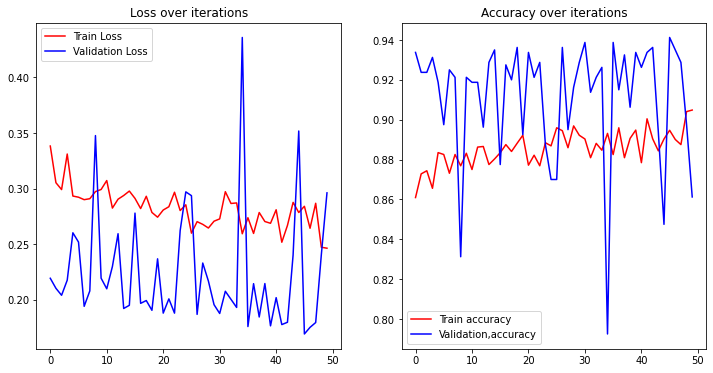

In [44]:
plot_accuracy_and_loss(history3)

<AxesSubplot:>

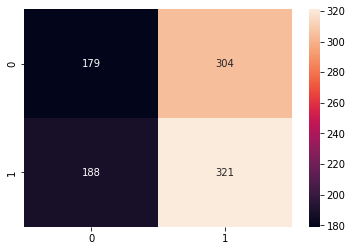

In [45]:
pred_prob3 = vgg_model.predict(test_generator3)
predict3 = (pred_prob3>0.5).astype('int32')

cm = confusion_matrix(test_generator3.classes,predict3)
cm_df = pd.DataFrame(cm, index=['0','1'],columns=['0','1'])
sns.heatmap(cm_df,annot=True,fmt='g')

auc score:  0.48912128274902683


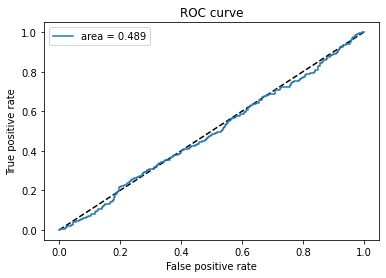

In [47]:
plot_and_print_auc(pred_prob3)

In [46]:
print(classification_report(y_test, predict3))

              precision    recall  f1-score   support

           0       0.49      0.37      0.42       483
           1       0.51      0.63      0.57       509

    accuracy                           0.50       992
   macro avg       0.50      0.50      0.49       992
weighted avg       0.50      0.50      0.50       992



In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50

base = ResNet50(weights='imagenet', 
                             input_shape=(128, 128, 3),
                             include_top=False)

base.trainable = False

resnet = Sequential()
resnet.add(base)
resnet.add(MaxPooling2D(pool_size=(2,2)))
resnet.add(Conv2D(128, (3,3),activation='relu', padding='valid'))
resnet.add(MaxPooling2D(pool_size=(2,2)))
resnet.add(Conv2D(64, (3,3), activation='relu', padding='valid'))
resnet.add(Conv2D(16, (3,3), activation='relu', padding='valid'))
resnet.add(Flatten())

resnet.add(Dense(32, activation='relu'))
# resnet.add(Dropout(0.5))

resnet.add(Dense(1, activation='sigmoid'))


resnet.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

resnet.summary()